<a href="https://colab.research.google.com/github/vidhipatani/Lab0-PySpark/blob/main/ALY6110_Assign3_VPATANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=babc05c900684940cef17f82271cdf8af6edbda80f0f2123aa3e8ab568ed2671
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count, mean, stddev, approx_count_distinct,round as spark_round

#Initialize Spark version
spark = SparkSession.builder.appName("HousingDataAnalysis").getOrCreate()

#Load the dataset
data = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)

data.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [5]:
# Show the first 5 elements of your dataset
data.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [6]:
# Count number of observations in the given dataset
num_observations = data.count()
print(f"Number of observations in the dataset: {num_observations}")

Number of observations in the dataset: 506


In [7]:
# Show the schema od the dataset
data.printSchema()


root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [8]:
# Drop the column 'b' from the dataset
data = data.drop("b")

In [11]:
# Round all of the numerical columns into two decimal place

numeric_cols = [col_name for col_name, dtype in data.dtypes if dtype in ('int', 'double')]

for col_name in numeric_cols:
    data = data.withColumn(col_name, spark_round(col(col_name), 2))

data.show(5)  # Display the first 5 rows to check rounding

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
only showing top 5 rows



In [12]:
# Create a new column (Age10)  with 10% increasing of 'age' column
data = data.withColumn("Age10", col("age") * 1.10)
data.select("age", "Age10").show(5)  # Display the first 5 rows to check the new column

+----+------------------+
| age|             Age10|
+----+------------------+
|65.2| 71.72000000000001|
|78.9|             86.79|
|61.1| 67.21000000000001|
|45.8|             50.38|
|54.2|59.620000000000005|
+----+------------------+
only showing top 5 rows



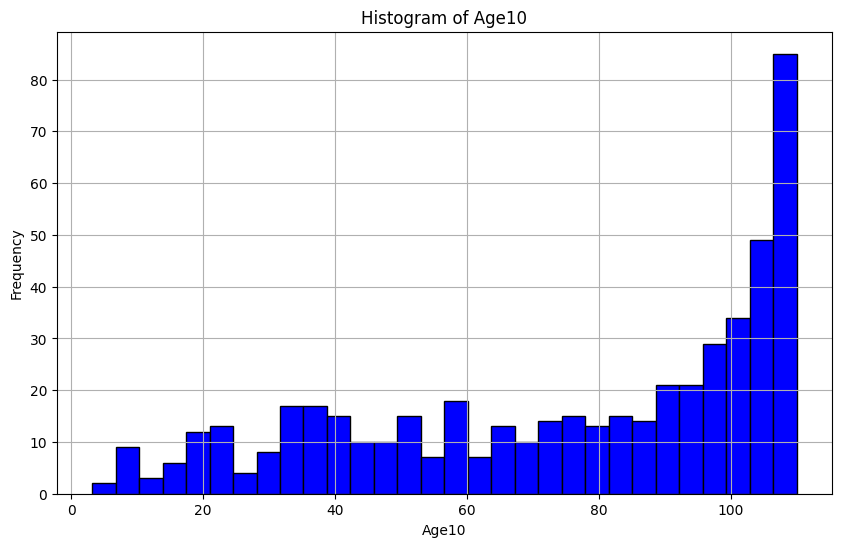

In [17]:
import matplotlib.pyplot as plt

# Plot histogram Age10 column on a 2D Plot
# Collect data for plotting
age10_data = data.select("Age10").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(age10_data["Age10"], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Age10")
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [19]:
# 9. Provide Summary Statistics of all columns (count, mean, stddev, min, max)
summary_stats = data.describe()
summary_stats.show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|              

In [21]:
# 10. Convert Spark DataFrame to Pandas DataFrame
pandas_df = data.toPandas()

In [22]:
# 11. Show the last 5 rows of Pandas DataFrame
print(pandas_df.tail(5))

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   

          b  lstat  medv   Age10  
501  391.99   9.67  22.4   76.01  
502  396.90   9.08  20.6   84.37  
503  396.90   5.64  23.9  100.10  
504  393.45   6.48  22.0   98.23  
505  396.90   7.88  11.9   88.88  
